# Modelo 2 (SVM)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from ydata_profiling import ProfileReport
import sklearn
import datetime

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report

In [2]:
data = pd.read_csv("data.csv")
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
8080,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
8081,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
8082,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [9]:
data.loc[:, 'Popularity'] = data['Popularity'].astype(int)

X = data.drop('Popularity', axis=1)
y = data['Popularity']
X = pd.get_dummies(X)

makes = data['Make']

X_train, X_test, y_train, y_test, makes_train, makes_test = train_test_split(X, y, makes, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(random_state=42)

svm_param_distributions = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_random_search = RandomizedSearchCV(estimator=svm, param_distributions=svm_param_distributions,
                                       n_iter=10, cv=2, verbose=2, random_state=42, n_jobs=-1)

svm_random_search.fit(X_train_scaled, y_train)
best_svm = svm_random_search.best_estimator_

y_pred_svm = best_svm.predict(X_test_scaled)
print("SVM con mejores Hiperparametros:")
print(f"Exactitud: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

results_svm = pd.DataFrame({'Make': makes_test, 'Predicted_Popularity': y_pred_svm})

avg_popularity_svm = results_svm.groupby('Make')['Predicted_Popularity'].mean().reset_index()

top_make_svm = avg_popularity_svm.loc[avg_popularity_svm['Predicted_Popularity'].idxmax()]

print("Mejor marca según SVM:")
print(top_make_svm)
avg_popularity_svm_sorted = avg_popularity_svm.sort_values(by='Predicted_Popularity', ascending=False)

top_3_makes_svm = avg_popularity_svm_sorted.head(3)

print("Tres marcas más populares según SVM:")
print(top_3_makes_svm)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
SVM con mejores Hiperparametros:
Exactitud: 1.0
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
          26       1.00      1.00      1.00         1
          61       1.00      1.00      1.00        31
          67       1.00      1.00      1.00         3
          86       1.00      1.00      1.00         6
         105       1.00      1.00      1.00        10
         113       1.00      1.00      1.00         1
         130       1.00      1.00      1.00         3
         155       1.00      1.00      1.00        25
         190       1.00      1.00      1.00        66
         204       1.00      1.00      1.00        50
         210       1.00      1.00      1.00        15
         238       1.00      1.00      1.00        12
         258       1.00      1.00      1.00        29
         259       1.00      1.00      1.00        19
         376       1.00   

In [10]:
print("Mejores hiperparámetros para SVM:")
print(svm_random_search.best_params_)

Mejores hiperparámetros para SVM:
{'kernel': 'linear', 'gamma': 'auto', 'C': 10}


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


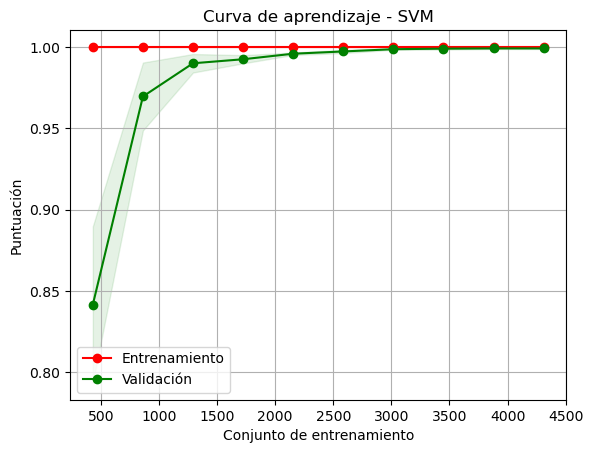

In [15]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Conjunto de entrenamiento")
    plt.ylabel("Puntuación")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validación")
    
    plt.legend(loc="best")
    return plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_params = best_svm.get_params()

if 'random_state' in svm_params:
    del svm_params['random_state']

svm = SVC(**svm_params, random_state=42)

title = "Curva de aprendizaje - SVM"

cv = 3

plot = plot_learning_curve(svm, title, X_train_scaled, y_train, cv=cv)
plt.show()